## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how='inner', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid_timepoint = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouseid_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped = combined_data[combined_data['Mouse ID'] == 'g989'].index
clean_df = combined_data.drop(dropped)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
regiment_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_stats['variance'] = regiment_var
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimen_stats['SEM'] = regimen_sem
reg_stats = regimen_stats.drop(columns=['count','min','25%','75%','max'])
reg_final = reg_stats.rename(columns={'50%':'median','std':'standard deviation'})
reg_final = reg_final[['mean', 'median','variance','standard deviation','SEM']]
reg_final

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
reg_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std', 'sem']})
reg_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_regimen = clean_df['Drug Regimen'].value_counts()
regimen_count_df = pd.DataFrame(total_regimen)
regimen_count_df.rename(columns={'Drug Regimen':'Total'},inplace=True)
regimen_count_df.index.name = 'Drug Regimen' 

Text(0, 0.5, 'Total')

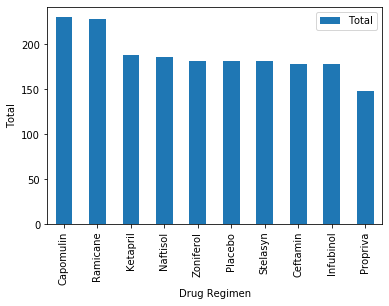

In [10]:
reg_bar = regimen_count_df.plot.bar(stacked=True)
reg_bar.set_ylabel('Total')

Text(0, 0.5, 'Total')

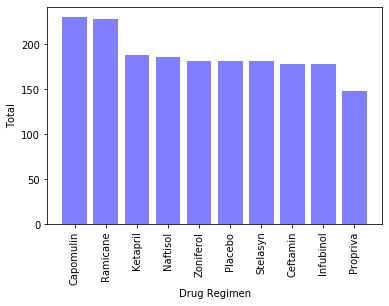

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = regimen_count_df.index
drug_total = regimen_count_df['Total'].values.tolist()
plt.bar(drug_regimen , drug_total, color ='b', alpha = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total')

,Total
Gender,
Male,958
Female,922


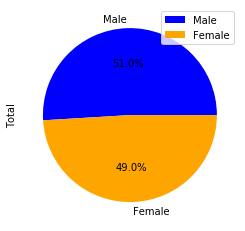

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = clean_df['Sex'].value_counts()
gend_dis = pd.DataFrame(gender_distribution)
gend_dis.rename(columns={'Sex':'Total'},inplace=True)
gend_dis.index.name = 'Gender' 
gend_pie = gend_dis.plot.pie(y='Total', stacked=True, autopct='%1.1f%%', colors = ['blue','orange'])
gend_dis

([<matplotlib.patches.Wedge at 0x7ffcb32ceeb8>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

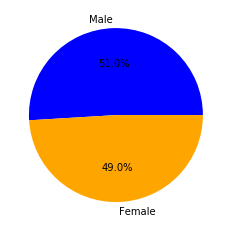

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = clean_df['Sex'].unique()
gender_count = gend_dis['Total'].values.tolist()
plt.pie(gender_count, labels = gender_label, autopct='%1.1f%%', colors = ['blue','orange'])

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint_max = clean_df[clean_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == clean_df['Timepoint']]

clean_final = timepoint_max[~timepoint_max['Drug Regimen'].isin(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])]
clean_final[['Mouse ID', 'Drug Regimen','Timepoint' ,'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [15]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [16]:
# Create seperate dataframe for Capomulin
capomulin = clean_final.groupby(['Drug Regimen'])
capomulin_df = capomulin.get_group('Capomulin')

In [17]:
# Create seperate dataframe for Ceftamin 
ceftamin = clean_final.groupby(['Drug Regimen'])
ceftamin_df = capomulin.get_group('Ceftamin')

In [18]:
# Create seperate dataframe for Infubinol 
infubinol = clean_final.groupby(['Drug Regimen'])
infubinol_df = capomulin.get_group('Infubinol')


In [19]:
# Create seperate dataframe for Ramicane 
ramicane = clean_final.groupby(['Drug Regimen'])
ramicane_df = capomulin.get_group('Ramicane')

In [20]:
# Create seperate dataframe for Ramicane 
ramicane = clean_final.groupby(['Drug Regimen'])
ramicane_df = capomulin.get_group('Ramicane')

In [21]:
# Find lower quartiles of every drug 
q1 = clean_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25)
q1

Drug Regimen
Capomulin    32.377357
Ceftamin     48.722078
Infubinol    54.048608
Ramicane     31.560470
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# Find upper quartiles of every drug 
q3 = clean_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75)
q3

Drug Regimen
Capomulin    40.159220
Ceftamin     64.299830
Infubinol    65.525743
Ramicane     40.659006
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Find the IQR of every drug 
IQR = q3 - q1 
IQR

Drug Regimen
Capomulin     7.781863
Ceftamin     15.577752
Infubinol    11.477135
Ramicane      9.098537
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# Determine if there are any potential outliers in Capomulin
capomulin_outlier_lower = q1[0] - (1.5*IQR[0])
capomulin_outlier_upper = q3[0] + (1.5*IQR[0])
capomulin_filt = [(capomulin_df['Tumor Volume (mm3)'] < capomulin_outlier_lower) | (capomulin_df['Tumor Volume (mm3)'] > capomulin_outlier_upper)]
cap_count_df = pd.DataFrame(capomulin_outlier)
cap_count_dft = cap_count_df.T
cap_count_dft['Tumor Volume (mm3)'].value_counts()
cap_out_count = (cap_count_dft['Tumor Volume (mm3)']).values.sum()

NameError: name 'capomulin_outlier' is not defined

In [ ]:
# Print capomulin result 
print(f'Values below {capomulin_outlier_lower} could be outliers.')
print(f'Values above {capomulin_outlier_upper} could be outliers.')
print(f'There could be {cap_out_count} outlier(s) in this dataset')

In [ ]:
# Determine if there are any potential outliers in Ceftamin
ceftamin_outlier_lower = q1[1] - (1.5*IQR[1])
ceftamin_outlier_upper = q3[1] + (1.5*IQR[1])
ceftamin_filt = (ceftamin_df['Tumor Volume (mm3)'] < ceftamin_outlier_lower) | (ceftamin_df['Tumor Volume (mm3)'] > ceftamin_outlier_upper)
cef_count_df = pd.DataFrame(ceftamin_filt)
cef_count_df['Tumor Volume (mm3)'].value_counts()
cef_out_count = (cef_count_df['Tumor Volume (mm3)']).values.sum()

In [ ]:
# Print ceftamin result 
print(f'Values below {ceftamin_outlier_lower} could be outliers.')
print(f'Values above {ceftamin_outlier_upper} could be outliers.')
print(f'There could be {cef_out_count} outlier(s) in this dataset')

In [ ]:
# Determine if there are any potential outliers in Infubinol
infubinol_outlier_lower = q1[2] - (1.5*IQR[2])
infubinol_outlier_upper = q3[2] + (1.5*IQR[2])
infubinol_filt = (infubinol_df['Tumor Volume (mm3)'] < infubinol_outlier_lower) | (infubinol_df['Tumor Volume (mm3)'] > infubinol_outlier_upper)
inf_count_df = pd.DataFrame(infubinol_filt)
inf_count_df['Tumor Volume (mm3)'].value_counts()
inf_out_count = (inf_count_df['Tumor Volume (mm3)']).values.sum()


In [ ]:
# Print infubinol result 
print(f'Values below {infubinol_outlier_lower} could be outliers.')
print(f'Values above {infubinol_outlier_upper} could be outliers.')
print(f'There could be {inf_out_count} outlier(s) in this dataset')
infubinol_df[infubinol_filt]

In [ ]:
# Determine if there are any potential outliers in Ramicane
ramicane_outlier_lower = q1[3] - (1.5*IQR[3])
ramicane_outlier_upper = q3[3] + (1.5*IQR[3])
ramicane_outlier = [(ramicane_df['Tumor Volume (mm3)'] < ramicane_outlier_lower) | (ramicane_df['Tumor Volume (mm3)'] > ramicane_outlier_upper)]
ram_count_df = pd.DataFrame(ramicane_outlier)
ram_count_dft = ram_count_df.T
ram_count_dft['Tumor Volume (mm3)'].value_counts()
ram_out_count = (ram_count_dft['Tumor Volume (mm3)']).values.sum()
print(f'Values below {ramicane_outlier_lower} could be outliers.')
print(f'Values above {ramicane_outlier_upper} could be outliers.')
print(f'There could be {ram_out_count} outlier(s) in this dataset')


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
